<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/KMeans_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
filename = '/content/drive/MyDrive/cust_seg-3.csv'
df =  pd.read_csv(filename)

In [3]:
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [4]:
df.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [5]:
df.isnull().any()

Unnamed: 0         False
Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [15]:
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

In [16]:
df['Defaulted'].fillna(df['Defaulted'].median(),inplace= True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().any().sum()

0

In [18]:
X = df.drop(columns= ['Unnamed: 0','Customer Id'])

In [19]:
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [20]:
scale = StandardScaler()
scaled = scale.fit_transform(X)

In [21]:
Ks = range(1,11)
inertiaa = []
for K in Ks:
 model = KMeans(n_clusters=K)
 model.fit(scaled)
 inertiaa.append(model.inertia_)

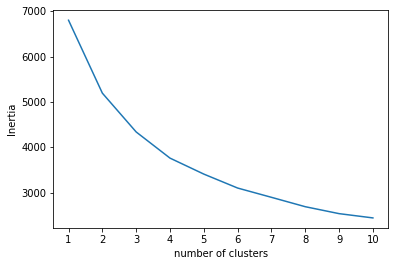

In [22]:
plt.plot(Ks,inertiaa)
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(Ks)
plt.show()

In [23]:
silhouette_scores = []
for i in range(2,11):
 Kmean = KMeans(n_clusters=i)
 Kmean.fit(X)
 silhouette_scores.append(silhouette_score(scaled,Kmean .labels_))

Text(0, 0.5, 'scores')

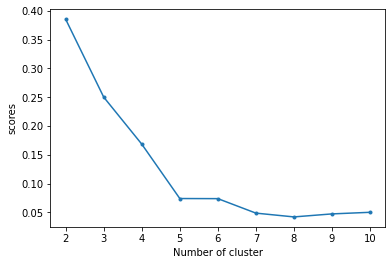

In [24]:
plt.plot(range(2,11),silhouette_scores,marker = '.')
plt.xlabel('Number of cluster')
plt.ylabel('scores')

In [25]:
kms = KMeans(n_clusters = 3, random_state = 42)
clus_pred = kms.fit_predict(scaled)
clus_pred

array([2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2,

In [26]:
X['cluster'] = clus_pred
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,0


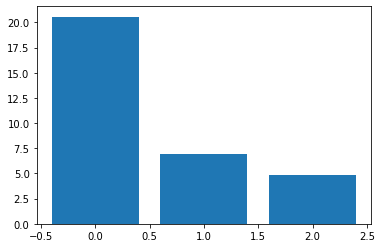

In [30]:
plt.bar(X['cluster'],X['Card Debt']);

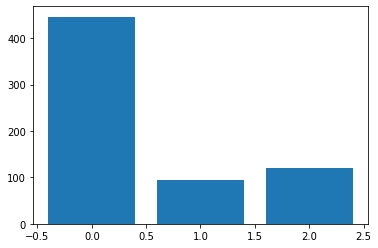

In [31]:
plt.bar(X['cluster'],X['Income']);

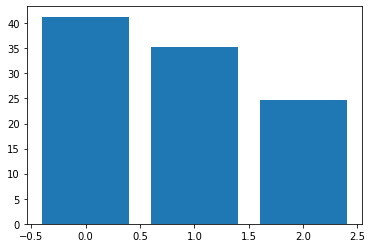

In [32]:
plt.bar(X['cluster'],X['DebtIncomeRatio']);

In [33]:
clus1 = X[X.cluster==0]
clus2 = X[X.cluster==1]
clus3 =X[X.cluster==2]

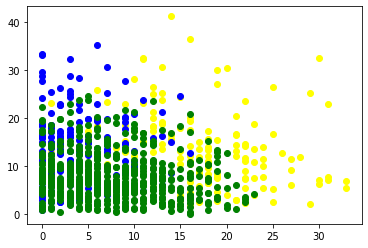

In [35]:
plt.scatter(clus1['Years Employed'],clus1['DebtIncomeRatio'],color='yellow');
plt.scatter(clus2['Years Employed'],clus2['DebtIncomeRatio'],color='blue');
plt.scatter(clus3['Years Employed'],clus3['DebtIncomeRatio'],color='green');
